# Download data from TCIA

This example Jupyter notebook demonstrates how to download data from The Cancer Imaging Archive (TCIA). Finally the data is visualised using the ImageVisualiser class within PlatiPy

In [ ]:
# Is platipy alread installed in your environment? If not run this cell to install it.
!pip install git+https://github.com/pyplati/platipy.git

### Import some functions to be able to download and visualise data

In [1]:
import SimpleITK as sitk

from platipy.dicom.download.tcia import (
    get_collections,
    get_modalities_in_collection,
    get_patients_in_collection,
    fetch_data
)
from platipy.imaging.visualisation.tools import ImageVisualiser
from platipy.imaging.utils.tools import get_com

## Let's get a list of all collections available in TCIA

You can also browse the list of collections available here: https://www.cancerimagingarchive.net/collections/

In [2]:
collections = get_collections()

## We'll use the 'Head-Neck Cetuximab' collection

In this cell we check what modalities are available with the collection

In [3]:
collection = 'Head-Neck Cetuximab'
modalities = get_modalities_in_collection(collection)
print(f"Modalities available: {modalities}")


Modalities available: ['PT', 'CT', 'RTDOSE', 'RTPLAN', 'RTSTRUCT']


## Next let's see find the patients available in the collection

In [4]:
patients = get_patients_in_collection(collection)

## Download the CT, RTSTRUCT and RTDOSE for the first patient

The fetch_data function will download the DICOM data from TCIA and will then convert it to NIFTI format for use within platipy.


In [5]:
patient_id = patients[0]
data = fetch_data(
    collection,
    patient_ids=[patient_id],
    modalities=["CT", "RTSTRUCT", "RTDOSE"],
    nifti=True
)

:12.837 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 688
2021-02-19 05:34:12.876 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 689
2021-02-19 05:34:12.907 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 690
2021-02-19 05:34:12.925 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 691
2021-02-19 05:34:12.937 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 692
2021-02-19 05:34:12.972 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 693
2021-02-19 05:34:13.007 | DEBUG    | platipy.dicom.dicom_directory_crawler.conversion_utils:process_dicom_file_list:276 -   Sorting file 694
2021-02-19 05:34:13.030 | DEB

## Finally, we load the NIFTI data and visualise it

In [6]:
ct_path = [p for p in data[patient_id]["NIFTI"]["IMAGES"] if p.name.endswith("CT_1.nii.gz")][0]
ct = sitk.ReadImage(str(ct_path))

structures = {s.name.split(".")[0].split("_")[-1]: sitk.ReadImage(str(s)) for s in data[patient_id]["NIFTI"]["STRUCTURES"]}

dose = sitk.ReadImage(str(data[patient_id]["NIFTI"]["DOSES"][0]))
dose = sitk.Resample(dose, ct)


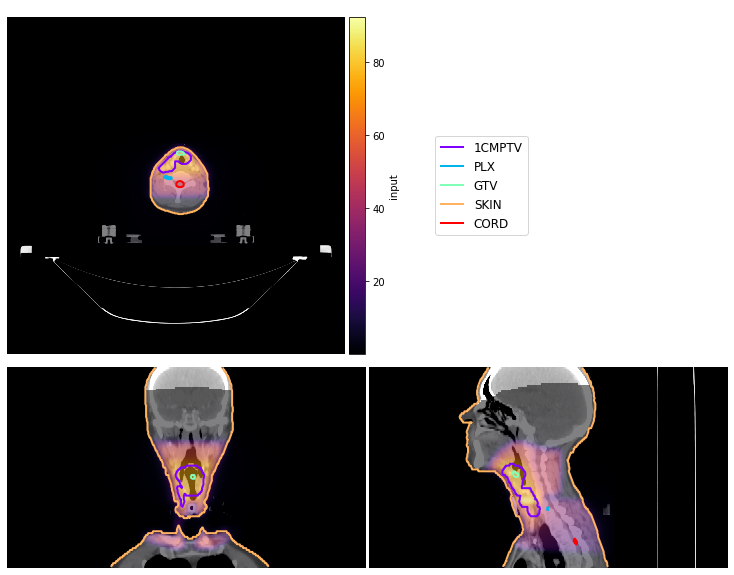

In [7]:
img_vis = ImageVisualiser(ct, cut=get_com(structures["GTV"]), figure_size_in=10)
img_vis.add_scalar_overlay(dose, colormap="inferno", alpha=0.5)
img_vis.add_contour(structures)
fig = img_vis.show()